# Multinominal Naive Bayes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

import pickle

X_train_smt = pickle.load(open("saved_feats/X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/y_test", "rb"))

ShuffleSplit_X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
ShuffleSplit_X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
ShuffleSplit_y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
ShuffleSplit_y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

In [2]:
clf_multiNB = MultinomialNB()
clf_multiNB.fit(X_train_smt, y_train_smt)

predictedMultiNB = clf_multiNB.predict(X_test)

In [3]:
print('Average accuracy :', np.mean(
    predictedMultiNB == y_test)*100)
print('Train accuracy :', (clf_multiNB.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_multiNB.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, predictedMultiNB))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, predictedMultiNB))

Average accuracy : 78.41264008818666
Train accuracy : 89.5599158614343
Test accuracy : 78.41264008818666

 CONFUSION MATRIX
[[  52   35   24]
 [  57   97   96]
 [ 238  725 4119]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.15      0.47      0.23       111
     Neutral       0.11      0.39      0.18       250
    Positive       0.97      0.81      0.88      5082

    accuracy                           0.78      5443
   macro avg       0.41      0.56      0.43      5443
weighted avg       0.92      0.78      0.84      5443



In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

n_samples = ShuffleSplit_X_train_smt.shape[0]
clf = MultinomialNB()
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
cross_val_score(clf, ShuffleSplit_X_train_smt, ShuffleSplit_y_train_smt, cv=cv)

array([0.87968134, 0.8821452 , 0.87762812, 0.88633377, 0.88083114,
       0.8852661 , 0.88395204, 0.88025624, 0.88304862, 0.87746386])

## Bayes OneVsRestClassifier

In [12]:
clf_mnb = OneVsRestClassifier(MultinomialNB())
clf_mnb.fit(X_train_smt, y_train_smt)
pred_mnb = clf_mnb.predict(X_test)
pred_prob_mnb = clf_mnb.predict_proba(X_test)

In [13]:
print('Predicted classes:', clf_mnb.classes_)
print('Average accuracy :', np.mean(pred_mnb == y_test)*100)
print('Train accuracy :', (clf_mnb.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_mnb.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_mnb))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, pred_mnb))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 79.31287892706229
Train accuracy : 89.54019588509827
Test accuracy : 79.31287892706229

 CONFUSION MATRIX
[[  56   30   25]
 [  62   87  101]
 [ 269  639 4174]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.14      0.50      0.22       111
     Neutral       0.12      0.35      0.17       250
    Positive       0.97      0.82      0.89      5082

    accuracy                           0.79      5443
   macro avg       0.41      0.56      0.43      5443
weighted avg       0.91      0.79      0.84      5443



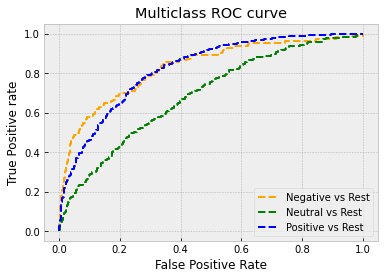

In [14]:
# roc curve for classes
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_mnb[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_mnb[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_mnb[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

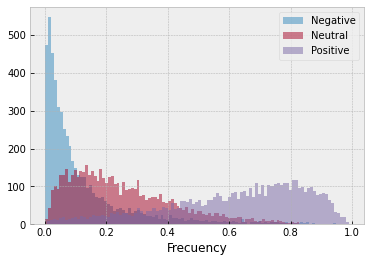

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(pred_prob_mnb[:, 0], 100, alpha=0.5, label="Negative")
ax.hist(pred_prob_mnb[:, 1], 100, alpha=0.5, label="Neutral")
ax.hist(pred_prob_mnb[:, 2], 100, alpha=0.5, label="Positive")
ax.set_xlabel('Probability')
ax.set_xlabel('Frecuency')
ax.legend(prop={'size': 10})

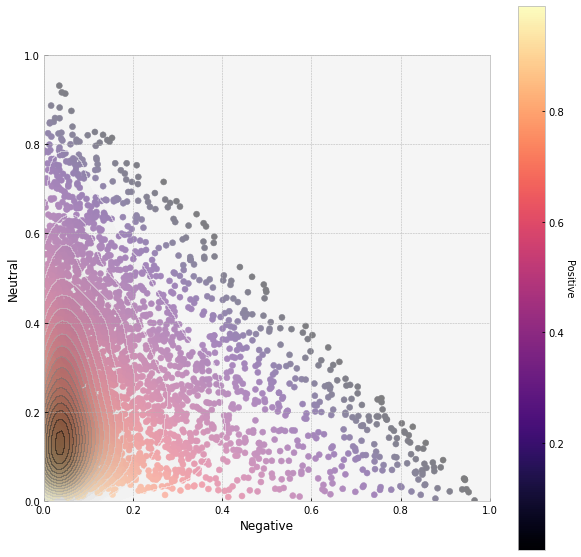

In [16]:
x = pred_prob_mnb[:, 0]
y = pred_prob_mnb[:, 1]
z = pred_prob_mnb[:, 2]
cmap = plt.get_cmap('magma')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
plt.scatter(x, y, c=z, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Positive', rotation=270, fontsize=10, labelpad=10.0)
ax.set_aspect('equal', adjustable='box')
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

xx, yy = np.mgrid[0:1:100j, 0:1:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

plt.contourf(xx, yy, f, levels=20, cmap=plt.get_cmap('Greys'), alpha=0.5)
plt.show()